In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import display
import scipy.stats as stats
import matplotlib.pyplot as plt

Hey Dylan, I apologize for not submitting as a PDF. I spent over an hour downloading packages and trying methods to download this as a PDF, but was unsuccessful. Will give it another shot this weekend

In [5]:
file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/gpa2.dta"
df = pd.read_stata(file_path)
df.head() 

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,0.010000
1,1170,18,4.00,0,0.82813,9.40,191,20.319149,0,1,0,88.360001
2,810,14,1.78,1,0.88372,1.19,42,35.294117,0,1,0,1.416100
3,940,40,2.42,0,0.80769,5.71,252,44.133099,0,1,0,32.604099
4,1180,18,2.61,0,0.73529,2.14,86,40.186916,0,1,0,4.579600


In [6]:
df.describe() 

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,1030.331158,52.832246,2.652686,0.046894,0.880537,2.799727,52.830070,19.237070,0.449601,0.925550,0.055354,10.853449
std,139.401392,35.329595,0.658635,0.211437,0.149123,1.736579,64.683584,16.568727,0.497514,0.262534,0.228698,12.623054
min,470.000000,6.000000,0.000000,0.000000,0.259740,0.030000,1.000000,0.166667,0.000000,0.000000,0.000000,0.000900
25%,940.000000,17.000000,2.210000,0.000000,0.775860,1.650000,11.000000,6.432748,0.000000,1.000000,0.000000,2.722500
50%,1030.000000,47.000000,2.660000,0.000000,0.866670,2.510000,30.000000,14.583333,0.000000,1.000000,0.000000,6.300100
75%,1120.000000,80.000000,3.120000,0.000000,0.964910,3.680000,70.000000,27.710844,1.000000,1.000000,0.000000,13.542400
max,1540.000000,137.000000,4.000000,1.000000,1.666670,9.400000,634.000000,92.000000,1.000000,1.000000,1.000000,88.360001


In [52]:
#run OLS for model m1: colgpa_i = beta_0 + beta_1 * female_i + U_i

m1_y = df['colgpa']
m1_X = df[['female']]

m1_X = sm.add_constant(m1_X)

m1 = sm.OLS(m1_y, m1_X)
m1_results = m1.fit()

print(m1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     48.16
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           4.55e-12
Time:                        01:25:01   Log-Likelihood:                -4118.1
No. Observations:                4137   AIC:                             8240.
Df Residuals:                    4135   BIC:                             8253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5888      0.014    188.626      0.0

In [35]:
m1_param_summary = m1_results.summary2().tables[1]
display(m1_param_summary)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,2.588823,0.013725,188.625789,0.000000e+00,2.561915,2.615731
female,0.142043,0.020469,6.939545,4.546881e-12,0.101913,0.182172


Q1 (a)

We determine that the p-value for each of these coefficients is about zero< 0.05, meaning the values are statistically significant at a 95% confidence level. We find from the model here that for males, the expected college GPA is 2.58 while for females the expected college GPA is 2.72. 

In [11]:
#get residuals for m1 regression and save
m1_residuals = m1_results.resid
df['m1_residuals'] = m1_residuals

In [14]:
#get residuals/colgpa for female
m1_residuals_given_fem = df.groupby('female')['m1_residuals']
m1_colgpa_given_fem = df.groupby('female')['colgpa']

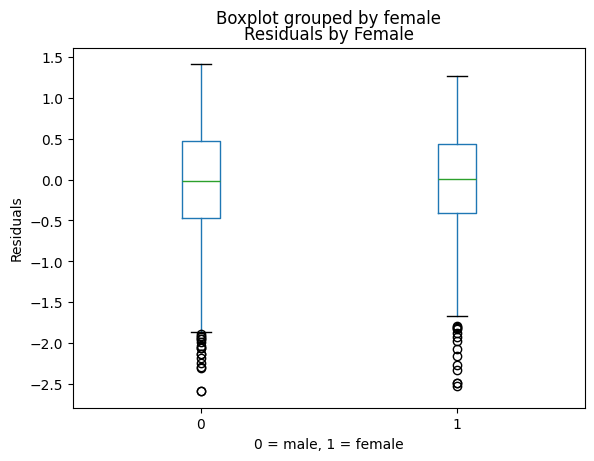

In [66]:
df.boxplot(column='m1_residuals', by='female', grid=False)

plt.xlabel('0 = male, 1 = female')
plt.ylabel('Residuals')
plt.title('Residuals by Female')
plt.show()

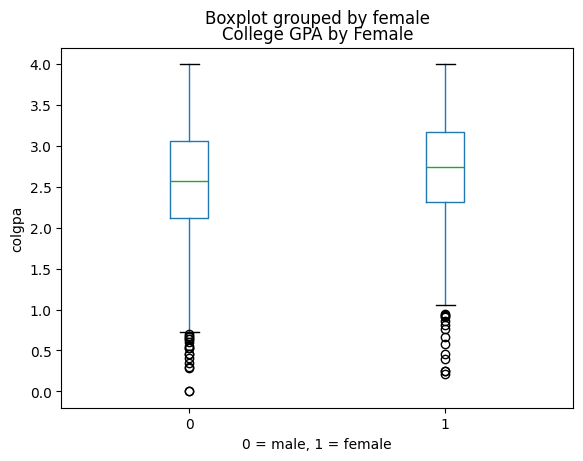

In [70]:
df.boxplot(column='colgpa', by='female', grid=False)

plt.xlabel('0 = male, 1 = female')
plt.ylabel('colgpa')
plt.title('College GPA by Female')
plt.show()

Q1 (b)
It seemed like a boxplot would be the best visual, since a scatterplot was not useful here since we are regressing on an indicator. From this data, we can clearly see that the distribution of residuals conditional on female is slightly different for female=0 versus female=1. The distribution of the latter appears a bit tighter than that of the former. For the distribution of colgpa conditional on female, we see that the means are different for female=0 versus female=1 and the distribution for female=1 is not as far skewed left. These facts suggests it is possible that the data is heteroscedastic.

In [53]:
#run OLS for model m2: colgpa_i = beta_0 + beta_1 * female_i + beta_2 * sat_i + V_i
m2_y = df['colgpa']
m2_X = df[['female', 'sat']]

m2_X = sm.add_constant(m2_X)

m2 = sm.OLS(m2_y, m2_X)
m2_results = m2.fit()

print(m2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     506.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.48e-197
Time:                        01:25:12   Log-Likelihood:                -3689.1
No. Observations:                4137   AIC:                             7384.
Df Residuals:                    4134   BIC:                             7403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4290      0.071      6.037      0.0

In [42]:
m2_param_summary = m2_results.summary2().tables[1]
display(m2_param_summary)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.428954,0.071052,6.037147,1.706434e-09,0.289653,0.568255
female,0.230671,0.018676,12.351023,1.934165e-34,0.194055,0.267286
sat,0.002058,0.000067,30.869957,1.763594e-188,0.001927,0.002188


Q1 (c)
The p-values here are all much less than 0.05, so they are statistically significant at the 95% level. These coefficients suggest that, holding SAT score fixed, being female rather than male leads to an expected increase of 0.23 in college GPA. Similarly, holding sex fixed, increasing SAT score by 1 point leads to a 0.002058 increase in college GPA. In more convincing units, an increase of 100 points on the SAT predicts a 0.2058 increase in college GPA. The coefficient for female increased from 0.1420 in M1 to 0.2306 here in M2. The implied OVB is then -0.0886. Since the coefficient for SAT in M2 is 0.002058 > 0 and the coefficient for female increased, from the formula for OVB of the coefficient for female, it follows that female and SAT must be negatively correlated.  

Q1 (d)

Supposing that the data is not homoscedastic (thus is heteroscedastic). The general estimates are valid but the general formula for the variance of beta^hat is $(X^T X)^{-1} X^T \Omega X (X^T X)^{-1}.$ Under homoscedasticity, since $\Omega$ is the matrix of $\sigma_i^{2}$, it reduces to $I  \sigma^{2}$, which when plugged back in reduces to the specific formula $\sigma^{2}  (X^T  X)^{-1}$.


In [71]:
#manually implement Breusch-Pagan

##step 1: obtain squared residuals
df['m2_residuals'] = m2_results.resid
df['m2_residuals_sq'] = df['m2_residuals'] ** 2

##step 2: regress squared residuals on independent variables
bp_y = df['m2_residuals_sq']

bp_X = sm.add_constant(df[['female', 'sat']])

bp_model = sm.OLS(bp_y, bp_X)
bp_results = bp_model.fit()

R2 = bp_results.rsquared

##step 3: compute F-statistic
k = len(bp_X.columns) - 1 
n = len(df)
F_stat = (R2 / k) / ((1 - R2) / (n - k - 1))

##step 4: compute p-value
p_value_F = 1 - stats.f.cdf(F_stat, dfn=k, dfd=n - k - 1)
print(f'F statistic: {F_stat}')
print(f'p-value: {p_value_F}')

F statistic: 5.408578504710496
p-value: 0.004509744881864397


Q1 (e)
After testing for heteroscedasticity using the Breusch-Pagan and White test, we find a p-value of 0.0045, which is statistically significant at the 95% level, meaning we reject the null hypothesis that the data is homoscedastic.

In [43]:
#rerun M2 but use robust standard errors
m2rob_y = df['colgpa']
m2rob_X = df[['female', 'sat']]

m2rob_X = sm.add_constant(m2rob_X)

m2rob = sm.OLS(m2rob_y, m2rob_X)
m2rob_results = m2rob.fit(cov_type='HC0')

print(m2rob_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     536.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.01e-208
Time:                        01:03:21   Log-Likelihood:                -3689.1
No. Observations:                4137   AIC:                             7384.
Df Residuals:                    4134   BIC:                             7403.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4290      0.069      6.213      0.0

In [44]:
m2rob_param_summary = m2rob_results.summary2().tables[1]
display(m2rob_param_summary)

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.428954,0.069044,6.212730,5.207183e-10,0.293630,0.564279
female,0.230671,0.018445,12.505847,6.935678e-36,0.194519,0.266822
sat,0.002058,0.000065,31.606197,3.034827e-219,0.001930,0.002185


Q1 (f)

From the Breusch-Pagan and White test, we determined that the data is heteroscedastic and thus we might reduce the variance around our estimates by applying robust standard errors. Looking at the standard errors for each coefficient between the regressions, we see that each decreased slightly. This conforms to expectations.

In [59]:
df['log_colgpa']

0       0.712950
1       1.386294
2       0.576613
3       0.883768
4       0.959350
          ...   
4132    0.806476
4133    0.900161
4134    1.386294
4135    1.040277
4136    1.371181
Name: log_colgpa, Length: 4137, dtype: float32

In [61]:
#investigate functional form: regress log(colgpa) on female and sat
df['log_colgpa'] = np.log(df['colgpa'])

X_log = sm.add_constant(df[['female', 'sat']])
y_log = df['log_colgpa']
log_model = sm.OLS(y_log, X_log).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_colgpa   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                nan
Time:                        01:51:12   Log-Likelihood:                    nan
No. Observations:                4137   AIC:                               nan
Df Residuals:                    4134   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1733: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


Q1 (g)

As the output above shows, I was unable to regress log(colgpa) on female and sat for reasons that elude me at the moment. Also, it is clear that since colleges run admissions processes where students with higher SAT scores are more likey to be admitted to certain schools, this might make the relationship between college GPA and SAT harder to interpret because certain schools (or programs within those schools) might have a different grading distribution.

Q1 (h)

If we assume the true population model for college GPA is linear and a function of the covariates for sex, SAT score, and hsperc, then we may have an omitted variable bias. The magnitude of the bias for beta_2^hat is equal to the true parameter beta_3 * Cov(sat, hsperc) / Var(sat). If we assume homoscedasticity, then the variance for beta_2^hat is equal to sigma^2 / SST_j * (1 - R_j^2), as given on slide 57 of Lecture 2. By adding another variable to our set of covariates, we increase the value of R_j^2 and thus decrease the denominator of this term, which increases the variance of beta_j^hat. 


Q1 (i)

The ideal randomized experiment to estimate the causal effect of female on colgpa would allow us to take a random sample of people from both female=0 and female=1 and give them equal treatment–send them to the same college, with equal resources, ask them to take the same classes and engage in the same extracurriculars, etc. 

Q1 (j)

Empirically, implementing a process described above is difficult because convincing people to make major life choices for the sake of a study is usually not practical. Also, controlling for other important factors like activities outside of school is difficult. Conceptually, it is also debatable whether it makes sense to estimate a causal effect of female. We cannot randomly assign the treatment 'female'=1 or 0 to any given person and see how it impacts them. We can only experiment on people who have already been assigned a value for 'female'. 

Q1 (k)

I personally find MLR4 to be not to be credible given that we only have one predictor with an R^2 of 0.01. Other key variables might be: indicator{private school}, geography, number of clubs involved with, household income, high school GPA. I think including the most important omitted variable in M1 would dramatically increase the predictive power of the model and, since I'd expect both female=1 and this important omitted variable to be positive correlated with college GPA, the implied OVB will be negative and therefore the coefficient for female will decrease or remain about the same. 